In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

# Dataframe

In [3]:
# Define dataframe
df = pd.read_csv("training_data4.csv")
df = df[:2254]
df = df.drop(df.columns[[0,1]], axis=1)
df = df.drop(columns="id")
df = df.drop(columns="index")
df = df.drop(columns="index_0_5")
df = df.drop(columns="index_5_10")
df = df.drop(columns="index_10_15")
df = df.drop(columns="index_15_20")
df = df.drop(columns="index_20_25")
df = df.drop(columns="index_25_30")
column_name_changes = {'min_word_count':'max_word_count',
                       'min_word_count_0_5':'max_word_count_0_5',
                       'min_word_count_5_10':'max_word_count_5_10',
                       'min_word_count_10_15':'max_word_count_10_15',
                       'min_word_count_15_20':'max_word_count_15_20',
                       'min_word_count_20_25':'max_word_count_20_25',
                       'min_word_count_25_30':'max_word_count_25_30',
                       'max_word_count':'min_word_count',
                       'max_word_count_0_5':'min_word_count_0_5',
                       'max_word_count_5_10':'min_word_count_5_10',
                       'max_word_count_10_15':'min_word_count_10_15',
                       'max_word_count_15_20':'min_word_count_15_20',
                       'max_word_count_20_25':'min_word_count_20_25',
                       'max_word_count_25_30':'min_word_count_25_30',
                       'min_action_time':'max_action_time',
                       'min_action_time_0_5':'max_action_time_0_5',
                       'min_action_time_5_10':'max_action_time_5_10',
                       'min_action_time_10_15':'max_action_time_10_15',
                       'min_action_time_15_20':'max_action_time_15_20',
                       'min_action_time_20_25':'max_action_time_20_25',
                       'min_action_time_25_30':'max_action_time_25_30',
                       'max_action_time':'min_action_time',
                       'max_action_time_0_5':'min_action_time_0_5',
                       'max_action_time_5_10':'min_action_time_5_10',
                       'max_action_time_10_15':'min_action_time_10_15',
                       'max_action_time_15_20':'min_action_time_15_20',
                       'max_action_time_20_25':'min_action_time_20_25',
                       'max_action_time_25_30':'min_action_time_25_30',
                       'min_inter_action_time':'max_inter_action_time',
                       'min_inter_action_time_0_5':'max_inter_action_time_0_5',
                       'min_inter_action_time_5_10':'max_inter_action_time_5_10',
                       'min_inter_action_time_10_15':'max_inter_action_time_10_15',
                       'min_inter_action_time_15_20':'max_inter_action_time_15_20',
                       'min_inter_action_time_20_25':'max_inter_action_time_20_25',
                       'min_inter_action_time_25_30':'max_inter_action_time_25_30',
                       'max_inter_action_time':'min_inter_action_time',
                       'max_inter_action_time_0_5':'min_inter_action_time_0_5',
                       'max_inter_action_time_5_10':'min_inter_action_time_5_10',
                       'max_inter_action_time_10_15':'min_inter_action_time_10_15',
                       'max_inter_action_time_15_20':'min_inter_action_time_15_20',
                       'max_inter_action_time_20_25':'min_inter_action_time_20_25',
                       'max_inter_action_time_25_30':'min_inter_action_time_25_30'}
df.rename(columns=column_name_changes, inplace=True)
#df.to_csv('dataset_for_correlation_table.csv')
df.head()

,comma,period,dash,qm,ep,sc,colon,revision_ratio,total_actions,one_min_pause_count,...,mean_inter_action_time_25_30,std_inter_action_time_25_30,skew_inter_action_time_25_30,score,action_occured_0_5,action_occured_5_10,action_occured_10_15,action_occured_15_20,action_occured_20_25,action_occured_25_30
0,0.400000,0.560000,0.000000,0.000000,0.0,0.04,0.0,0.171817,2557.0,2.0,...,3409.391892,17976.440849,8.310227,3.5,1,1,1,1,1,1
1,0.486486,0.324324,0.108108,0.081081,0.0,0.00,0.0,0.118289,2454.0,3.0,...,2630.726415,13556.384903,6.555030,3.5,1,1,1,1,1,1
2,0.500000,0.475000,0.025000,0.000000,0.0,0.00,0.0,0.152399,4136.0,4.0,...,584.396419,4680.999225,13.580859,6.0,1,1,1,1,1,1
3,0.187500,0.812500,0.000000,0.000000,0.0,0.00,0.0,0.103780,1556.0,2.0,...,0.000000,0.000000,0.000000,2.0,1,1,1,1,1,0
4,0.589744,0.358974,0.000000,0.051282,0.0,0.00,0.0,0.210248,2531.0,3.0,...,829.014599,3764.831099,8.236028,4.0,1,1,1,1,1,1


In [4]:
# Divide feature and target
y = df["score"]
X = df.drop(columns='score', axis=1)

In [5]:
# Determine the number of rows/columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2254
Number of columns: 252


# EDA

## Scores

In [6]:
print("Mean of scores:", y.mean())
print("Median of scores:", y.median())
print("Standard deviation of scores:", y.std())
print()
df["score"].value_counts()

Mean of scores: 3.7236024844720497
Median of scores: 4.0
Standard deviation of scores: 1.0219092050462317



4.0    454
3.5    451
4.5    375
3.0    294
2.5    189
5.0    164
5.5    120
2.0     79
1.5     56
1.0     34
6.0     33
0.5      5
Name: score, dtype: int64

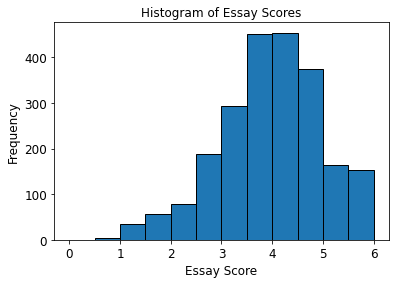

In [7]:
plt.hist(y, bins=np.arange(0, 6.5, 0.5), edgecolor='black')
plt.xlabel("Essay Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Essay Scores", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Score.pdf', dpi=1000, bbox_inches='tight')
plt.show()

## Univariate

In [8]:
print("\nSummary statistics for numerical features:")
df.describe()


Summary statistics for numerical features:


,comma,period,dash,qm,ep,sc,colon,revision_ratio,total_actions,one_min_pause_count,...,mean_inter_action_time_25_30,std_inter_action_time_25_30,skew_inter_action_time_25_30,score,action_occured_0_5,action_occured_5_10,action_occured_10_15,action_occured_15_20,action_occured_20_25,action_occured_25_30
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,...,2.254000e+03,2.254000e+03,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000
mean,0.352659,0.583261,0.025130,0.025788,0.004121,0.005009,0.004033,0.132502,3392.558119,2.429902,...,1.817888e+04,1.795035e+04,7.135760,3.723602,0.989796,0.989796,0.992458,0.980479,0.967169,0.925466
std,0.169231,0.194921,0.046643,0.060500,0.017330,0.026015,0.018033,0.075985,1538.986319,2.108721,...,7.059865e+04,4.835664e+04,6.140248,1.021909,0.100521,0.100521,0.086537,0.138377,0.178232,0.262696
min,0.000000,-1.000000,0.000000,-0.041667,0.000000,-0.100000,0.000000,0.000000,262.000000,0.000000,...,0.000000e+00,0.000000e+00,-2.232224,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.078586,2208.000000,1.000000,...,5.050794e+02,1.746008e+03,2.216094,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.375000,0.551372,0.000000,0.000000,0.000000,0.000000,0.000000,0.118384,3087.000000,2.000000,...,1.191834e+03,5.307708e+03,6.443384,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.475000,0.708333,0.034043,0.037037,0.000000,0.000000,0.000000,0.170249,4299.250000,3.000000,...,6.985081e+03,1.614717e+04,10.564275,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.250000,1.000000,0.473684,2.000000,0.277778,0.717391,0.428571,0.722795,12876.000000,11.000000,...,1.213358e+06,1.052140e+06,60.018785,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


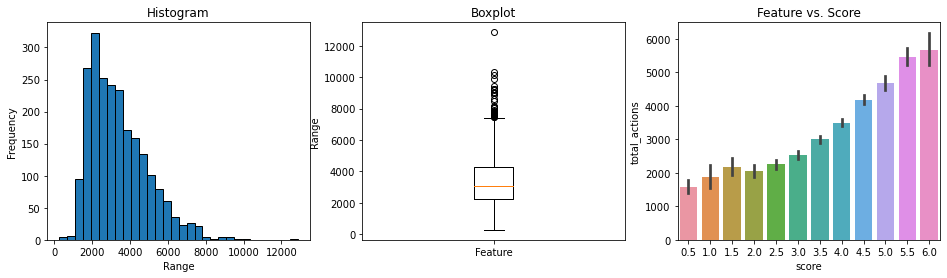

In [9]:
# Uni- and bi-variate plots using "total_actions" feature as an example

feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(feature, bins=30, edgecolor='black')

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(feature)
ax[1].set_xticklabels(['Feature'])

# Catplot
ax[2].set_title('Feature vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Feature')
sns.barplot(data=df, x="score", y="total_actions", ax=ax[2])

plt.savefig('EDA.svg')
plt.show()

In [10]:
# # Considering all features

# for i in df.columns:

#   print(i)
#   feature = df[i]
#   fig, ax = plt.subplots(1,3, figsize=(16,4))

#   # Histogram
#   ax[0].set_title('Histogram')
#   ax[0].set_xlabel('Range')
#   ax[0].set_ylabel('Frequency')
#   ax[0].hist(feature, bins=30)

#   # Boxplot
#   ax[1].set_title('Boxplot')
#   ax[1].set_ylabel('Range')
#   ax[1].boxplot(feature)
#   ax[1].set_xticklabels(['Feature'])

#   # Catplot
#   ax[2].set_title('Feature vs. Score')
#   ax[2].set_xlabel('Score')
#   ax[2].set_ylabel('Feature')
#   sns.barplot(data=df, x="score", y=i, ax=ax[2])

#   plt.show()

## Bivariate

In [11]:
# Correlation between two features
corr = df.corr()
corr

,comma,period,dash,qm,ep,sc,colon,revision_ratio,total_actions,one_min_pause_count,...,mean_inter_action_time_25_30,std_inter_action_time_25_30,skew_inter_action_time_25_30,score,action_occured_0_5,action_occured_5_10,action_occured_10_15,action_occured_15_20,action_occured_20_25,action_occured_25_30
comma,1.000000,-0.895464,0.124539,0.011482,-0.021130,-0.002867,-0.041496,0.073048,0.337484,-0.096431,...,-0.024313,-0.027243,0.079114,0.458520,0.001860,0.001860,0.062497,0.033447,0.037522,0.019380
period,-0.895464,1.000000,-0.364461,-0.325495,-0.096064,-0.142442,-0.073149,-0.102290,-0.382021,0.118793,...,0.023788,0.021736,-0.094807,-0.488681,-0.006851,-0.006851,-0.072398,-0.051740,-0.038943,-0.023824
dash,0.124539,-0.364461,1.000000,0.003412,0.008406,0.067669,0.067104,0.070880,0.210081,-0.046871,...,-0.013969,0.015622,0.026369,0.237140,0.013785,0.013785,0.023950,0.034954,0.039720,0.021200
qm,0.011482,-0.325495,0.003412,1.000000,0.071688,-0.011015,-0.006183,0.019446,0.071189,-0.042493,...,0.008922,0.012722,0.060253,0.100080,0.001850,0.001850,0.037166,0.022448,-0.004423,0.013291
ep,-0.021130,-0.096064,0.008406,0.071688,1.000000,-0.012541,0.031474,-0.013401,0.006991,-0.035412,...,0.016698,-0.000838,-0.018634,0.007247,-0.008111,-0.008111,0.020735,0.011439,-0.080312,-0.063044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
action_occured_5_10,0.001860,-0.006851,0.013785,0.001850,-0.008111,0.009543,0.008760,0.047414,0.093036,0.045832,...,0.018747,0.025964,-0.005098,0.089195,1.000000,1.000000,0.297299,-0.014327,-0.018707,0.004802
action_occured_10_15,0.062497,-0.072398,0.023950,0.037166,0.020735,-0.020800,0.019502,0.013770,0.094135,0.027505,...,-0.036327,-0.088405,0.025771,0.114442,0.297299,0.297299,1.000000,0.135963,0.099049,0.053359
action_occured_15_20,0.033447,-0.051740,0.034954,0.022448,0.011439,0.025721,0.031566,0.102572,0.139707,0.005956,...,-0.214403,-0.110603,0.118810,0.120336,-0.014327,-0.014327,0.135963,1.000000,0.333933,0.204159
action_occured_20_25,0.037522,-0.038943,0.039720,-0.004423,-0.080312,0.021150,0.027585,0.087984,0.147901,0.044655,...,-0.220824,-0.162181,0.141338,0.081750,-0.018707,-0.018707,0.099049,0.333933,1.000000,0.307945


In [12]:
# Determine pairs above set threshold
threshold = 0.8
print("Strong correlations:")
for i in range(len(corr.columns)):
  for j in range(i+1, len(corr.columns)):
    if abs(corr.iloc[i,j]) > threshold:
      print(f"{corr.columns[i]} and {corr.columns[j]}: {corr.iloc[i,j]}")

Strong correlations:
comma and period: -0.8954642124829002
total_actions and max_word_count: 0.8169111685624548
total_actions and median_word_count: 0.822984881830162
total_actions and mean_word_count: 0.82791290433322
total_actions and std_word_count: 0.8202487385295226
one_min_pause_count and one_min_pause_to_output_ratio: 0.8782247029573881
comma_0_5 and comma_5_10: 1.0
period_0_5 and period_5_10: 1.0
dash_0_5 and dash_5_10: 1.0
qm_0_5 and qm_5_10: 1.0
ep_0_5 and ep_5_10: 1.0
sc_0_5 and sc_5_10: 1.0
colon_0_5 and colon_5_10: 1.0
revision_ratio_0_5 and revision_ratio_5_10: 1.0
total_actions_0_5 and total_actions_5_10: 1.0
total_actions_0_5 and max_word_count_0_5: 0.8883485623955989
total_actions_0_5 and median_word_count_0_5: 0.845138183198971
total_actions_0_5 and mean_word_count_0_5: 0.8656957112366328
total_actions_0_5 and std_word_count_0_5: 0.8845234422142205
total_actions_0_5 and max_word_count_5_10: 0.8883485623955989
total_actions_0_5 and median_word_count_5_10: 0.84513818319

max_inter_action_time and std_inter_action_time: 0.8683167448237855
min_word_count_0_5 and min_word_count_5_10: 1.0
max_word_count_0_5 and median_word_count_0_5: 0.9722875543735744
max_word_count_0_5 and mean_word_count_0_5: 0.9895168914693935
max_word_count_0_5 and std_word_count_0_5: 0.9945848046584667
max_word_count_0_5 and max_word_count_5_10: 1.0
max_word_count_0_5 and median_word_count_5_10: 0.9722875543735744
max_word_count_0_5 and mean_word_count_5_10: 0.9895168914693935
max_word_count_0_5 and std_word_count_5_10: 0.9945848046584667
max_word_count_0_5 and min_word_count_10_15: 0.9826230616426508
max_word_count_0_5 and max_word_count_10_15: 0.8877722374845901
max_word_count_0_5 and median_word_count_10_15: 0.9439570138864456
max_word_count_0_5 and mean_word_count_10_15: 0.9463048891819342
median_word_count_0_5 and mean_word_count_0_5: 0.9929217694502811
median_word_count_0_5 and std_word_count_0_5: 0.9621860994084497
median_word_count_0_5 and max_word_count_5_10: 0.9722875543735

In [13]:
# Correlations with score (in descending order)

# Get the last column name
last_column_name = 'score'

# Calculate correlations with the last column
correlations = df.corrwith(df[last_column_name])

# Sort correlations in descending order
correlations_sorted = correlations.sort_values(ascending=False)

# Set Pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the correlations in descending order
print(f"Correlations with {last_column_name} (in descending order):")
print(correlations_sorted)

# Reset display options to the default value (if needed)
pd.reset_option('display.max_rows')

Correlations with score (in descending order):
score                                  1.000000
max_word_count                         0.634964
std_word_count                         0.632015
mean_word_count                        0.623607
median_word_count                      0.603044
total_actions                          0.597709
max_word_count_20_25                   0.595005
mean_word_count_20_25                  0.577262
median_word_count_20_25                0.576202
max_word_count_15_20                   0.561086
median_word_count_25_30                0.560577
mean_word_count_25_30                  0.560485
max_word_count_25_30                   0.558340
min_word_count_25_30                   0.557510
min_word_count_20_25                   0.543181
mean_word_count_15_20                  0.528834
total_actions_10_15                    0.527847
median_word_count_15_20                0.527293
total_actions_15_20                    0.507782
std_word_count_10_15                   0.

# Modeling

## Setup

In [14]:
# Remove rows with NaN values
df = df.dropna()

# Divide feature and target
y = df["score"]
X = df.drop(columns='score', axis=1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (1803, 251) (1803,)
test: (451, 251) (451,)


In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV,KFold,cross_val_score,learning_curve)
from sklearn.metrics import (accuracy_score,roc_auc_score,mean_squared_error)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, SGDRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from time import time
import xgboost
import lightgbm as lgb
%matplotlib inline

In [16]:
columns_list = list(X_test.columns)

## Define functions

In [17]:
def fit_regressor(reg, X_train, y_train):
  # Fit the regressor on the training set
  ### START CODE ###
  reg.fit(X_train, y_train)
  ### END CODE ###
  return reg

In [18]:
def evaluate_regressor(reg, X_test, y_test):
  # Compute the mse, rmse on the test set
  ### START CODE ###
  y_pred = reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  ### END CODE ###
  print("MSE: {}, RMSE: {}".format(mse,rmse))

In [19]:
def grid_search_for_regressor(reg, param_grid, X_train, y_train):
  # Grid search
  grid_search = GridSearchCV(reg, param_grid=param_grid, n_jobs=-1)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
  grid_search.fit(X_train, y_train)
  ### END CODE ###
  print(grid_search.best_params_)

  # Set the best paramters for your reg (1 line of code only)
  ### START CODE ###
  reg.set_params(**grid_search.best_params_)
  ### END CODE ###
  return reg

In [20]:
def train_and_evaluate_regressor(reg, X_train, y_train, X_test, y_test):
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  reg.fit(X_train, y_train)
  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_pred = reg.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  # Compute the mse, rmse on the test set
  ### START CODE ###
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  ### END CODE ###

  print("MSE: {}, RMSE: {}".format(mse,rmse))
  return reg

## Gradient Boosting

In [21]:
%%time
print("Gradient Boosting (Default)")
gb_reg = GradientBoostingRegressor()
gb_reg = fit_regressor(gb_reg, X_train, y_train)
evaluate_regressor(gb_reg, X_test, y_test)

Gradient Boosting (Default)
MSE: 0.3772113060413407, RMSE: 0.6141753056264478
Wall time: 5.53 s


In [22]:
%%time
# param_grid = {"loss": ['squared_error', 'absolute_error', 'huber'],
#               "learning_rate": [0.01, 0.1, 0.5],
#               "n_estimators": [10, 100, 500],
#               "criterion": ['friedman_mse', 'squared_error'],
#               "random_state": [42],
#               "max_features": [None, 'sqrt', 'log2']}

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'random_state': [42]
}

print("Gradient Boosting (Optimal)")
gb_reg = GradientBoostingRegressor()
gb_reg = grid_search_for_regressor(gb_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(gb_reg, X_train, y_train, X_test, y_test)

Gradient Boosting (Optimal)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42}
training time 2.706 s
predict time 0.003 s
MSE: 0.3795204653324348, RMSE: 0.6160523235346449
Wall time: 4min 13s


GradientBoostingRegressor(n_estimators=50, random_state=42)

In [23]:
gb_reg

GradientBoostingRegressor(n_estimators=50, random_state=42)

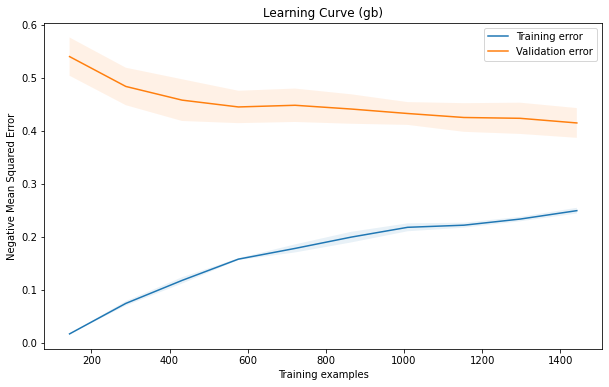

In [24]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (gb)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [25]:
feature_importance_values = gb_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(50)

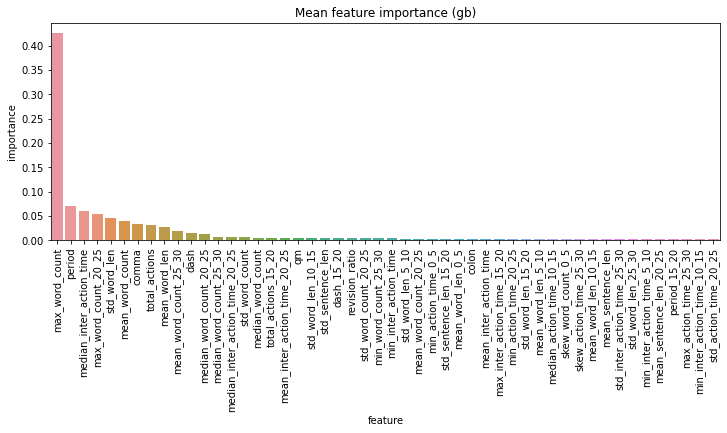

In [26]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean feature importance (gb)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [27]:
y_pred = gb_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.432425
1       4.0   3.729118
2       3.5   4.036339
3       3.0   3.076636
4       3.5   4.316421
..      ...        ...
446     2.5   4.006428
447     4.5   4.590201
448     3.0   3.298831
449     3.0   2.887824
450     2.5   2.813370

[451 rows x 2 columns]


Average Absolute Error: 0.4786094079229936


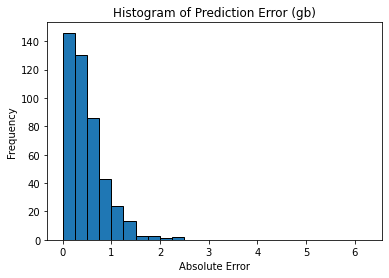

In [28]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (gb)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

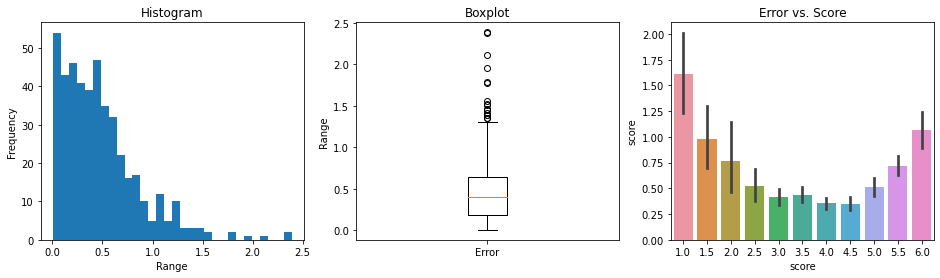

In [29]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

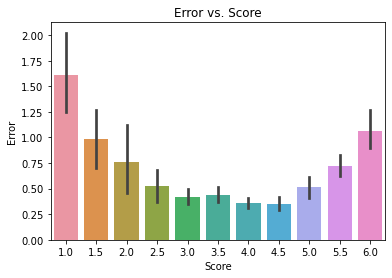

In [30]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Score')
plt.xlabel('Score')
plt.ylabel('Error')

plt.show()

## Random Forest

In [31]:
%%time
print("Random Forest (Default)")
rf_reg = RandomForestRegressor()
rf_reg = fit_regressor(rf_reg, X_train, y_train)
evaluate_regressor(rf_reg, X_test, y_test)

Random Forest (Default)
MSE: 0.4037920731707317, RMSE: 0.6354463574297453
Wall time: 10.7 s


In [32]:
%%time
# param_grid = {"n_estimators": [10, 100, 1000],
#               "criterion": ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
#               "max_features": [None, 'sqrt', 'log2'],
#               "max_depth": [None, 10, 100, 1000],
#               "random_state": [42]}

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

print("Random Forest (Optimal)")
rf_reg = RandomForestRegressor()
rf_reg = grid_search_for_regressor(rf_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(rf_reg, X_train, y_train, X_test, y_test)

Random Forest (Optimal)
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
training time 1.588 s
predict time 0.026 s
MSE: 0.3964530487804878, RMSE: 0.6296451768897208
Wall time: 1min 53s


RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

In [33]:
rf_reg

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

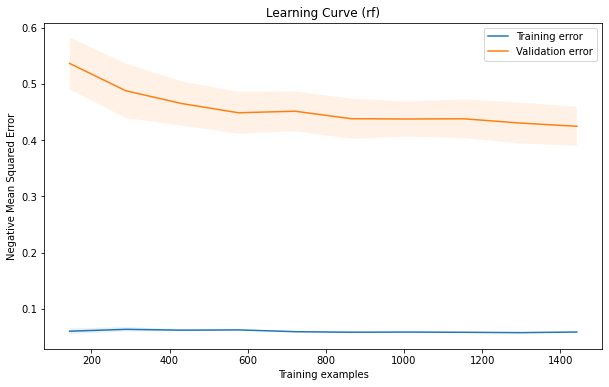

In [34]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (rf)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [35]:
feature_importance_values = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(50)

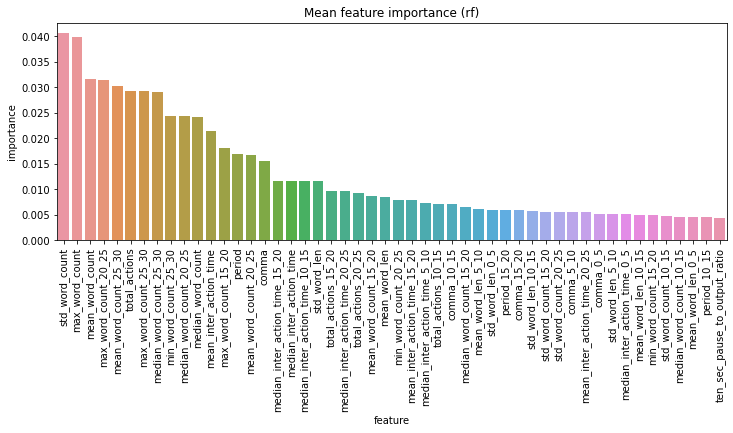

In [36]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean feature importance (rf)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [37]:
y_pred = rf_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0     3.2275
1       4.0     3.6550
2       3.5     3.8025
3       3.0     3.1725
4       3.5     4.4350
..      ...        ...
446     2.5     3.8200
447     4.5     4.5475
448     3.0     3.3100
449     3.0     3.1025
450     2.5     2.9850

[451 rows x 2 columns]


Average Absolute Error: 0.48228381374722845


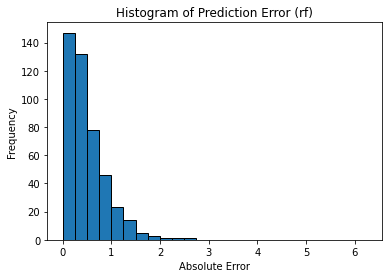

In [38]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (rf)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

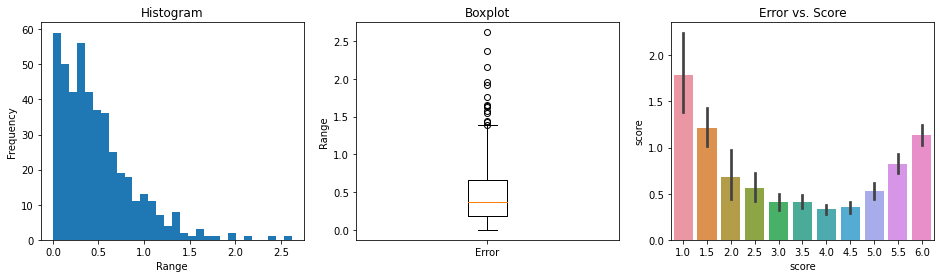

In [39]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

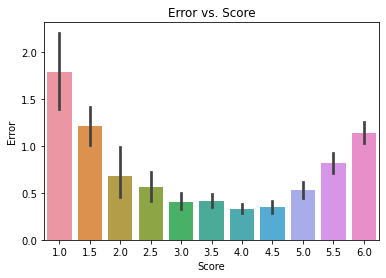

In [40]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Score')
plt.xlabel('Score')
plt.ylabel('Error')

plt.show()

## AdaBoost

In [41]:
%%time
print("AdaBoost (Default)")
ab_reg = AdaBoostRegressor()
ab_reg = fit_regressor(ab_reg, X_train, y_train)
evaluate_regressor(ab_reg, X_test, y_test)

AdaBoost (Default)
MSE: 0.4421851982107516, RMSE: 0.6649700731692755
Wall time: 2.06 s


In [42]:
%%time
# param_grid = {"n_estimators": [10, 50, 100],
#           "learning_rate": [0.01, 0.1, 1],
#           "random_state": [42],
#           "loss": ['linear', 'square', 'exponential']}

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

print("AdaBoost (Optimal)")
ab_reg = AdaBoostRegressor()
ab_reg = grid_search_for_regressor(ab_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(ab_reg, X_train, y_train, X_test, y_test)

AdaBoost (Optimal)
{'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 42}
training time 4.887 s
predict time 0.025 s
MSE: 0.4323554701820426, RMSE: 0.6575374287308994
Wall time: 2min 37s


AdaBoostRegressor(learning_rate=0.2, loss='exponential', n_estimators=100,
                  random_state=42)

In [43]:
ab_reg

AdaBoostRegressor(learning_rate=0.2, loss='exponential', n_estimators=100,
                  random_state=42)

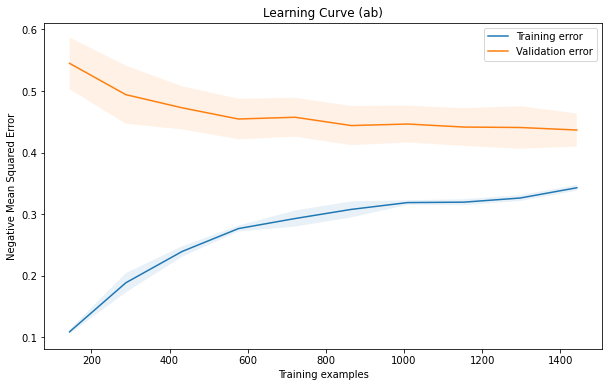

In [44]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    ab_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (ab)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [45]:
feature_importance_values = ab_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(50)

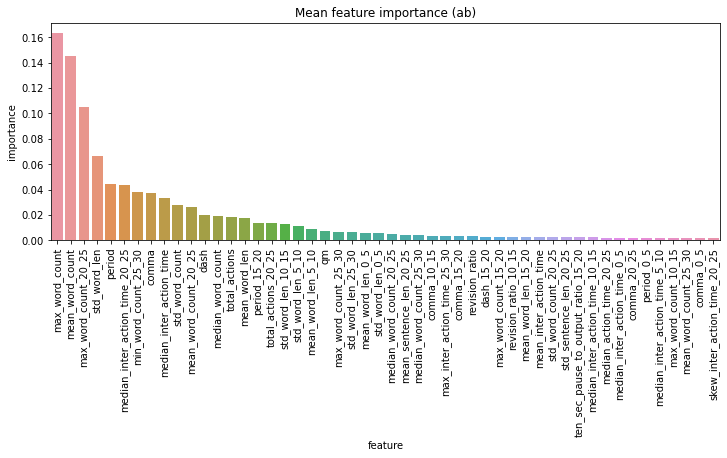

In [46]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean feature importance (ab)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [47]:
y_pred = ab_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.011583
1       4.0   3.487500
2       3.5   4.026462
3       3.0   2.945946
4       3.5   4.437304
..      ...        ...
446     2.5   4.369444
447     4.5   4.571839
448     3.0   3.393536
449     3.0   2.670543
450     2.5   2.577713

[451 rows x 2 columns]


Average Absolute Error: 0.5120274463135855


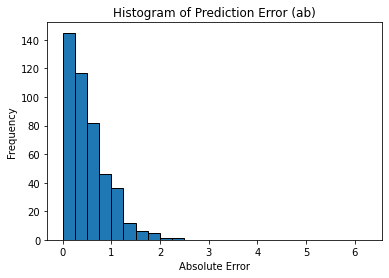

In [48]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (ab)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

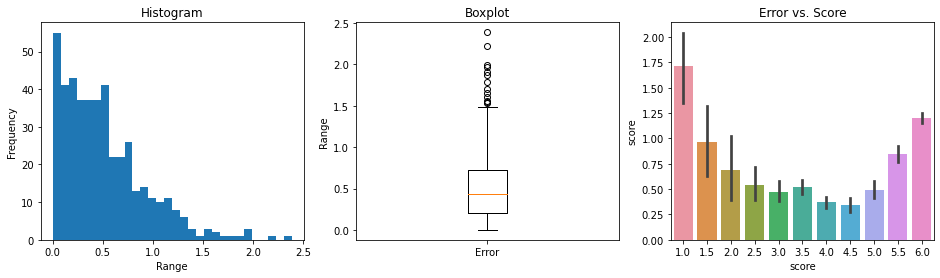

In [49]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

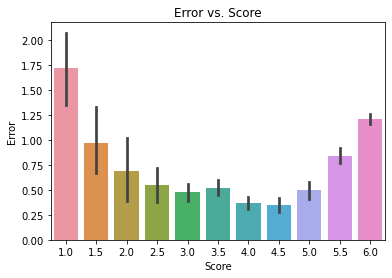

In [50]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Score')
plt.xlabel('Score')
plt.ylabel('Error')

plt.show()

## XGBoost

In [51]:
%%time
print("XGBoost (Default)")
xgb_reg = xgboost.XGBRegressor()
xgb_reg = fit_regressor(xgb_reg, X_train, y_train)
evaluate_regressor(xgb_reg, X_test, y_test)

XGBoost (Default)
MSE: 0.4125490713518468, RMSE: 0.6422998297927899
Wall time: 1.74 s


In [52]:
%%time
# param_grid = {"n_estimators": [100, 200, 300],
#           "learning_rate": [0.01, 0.05, 0.1],
#           "max_depth": [3, 4, 5],
#           "random_state": [42]}

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'random_state': [42]
}

print("XGBoost (Optimal)")
xgb_reg = xgboost.XGBRegressor()
xgb_reg = grid_search_for_regressor(xgb_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(xgb_reg, X_train, y_train, X_test, y_test)

XGBoost (Optimal)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
training time 0.513 s
predict time 0.013 s
MSE: 0.38747646457218066, RMSE: 0.6224760755018466
Wall time: 2min 15s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

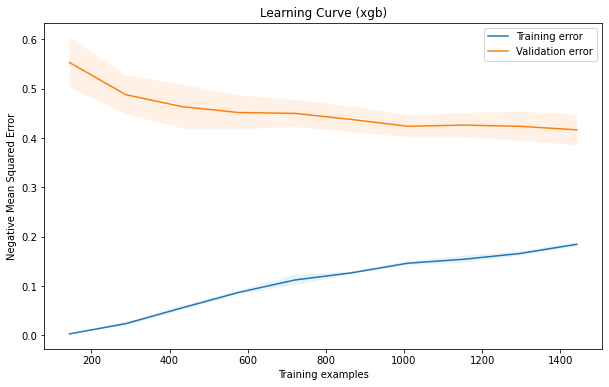

In [54]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (xgb)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [55]:
feature_importance_values = xgb_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
# feature_importance_df.to_csv('feature_importance.csv', index=False)
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(30)

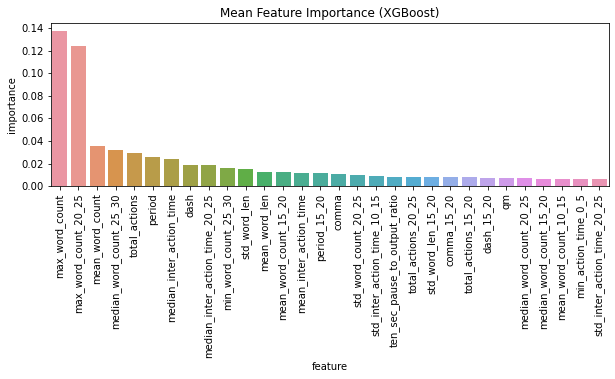

In [56]:
plt.figure(figsize=(10, 3))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean Feature Importance (XGBoost)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('Feature.pdf', dpi=1000, bbox_inches='tight')
plt.show()

In [57]:
y_pred = xgb_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.481008
1       4.0   3.886645
2       3.5   4.075315
3       3.0   3.168654
4       3.5   4.340413
..      ...        ...
446     2.5   3.795062
447     4.5   4.731173
448     3.0   3.291196
449     3.0   2.883898
450     2.5   2.833537

[451 rows x 2 columns]


Average Absolute Error: 0.4824183991637304


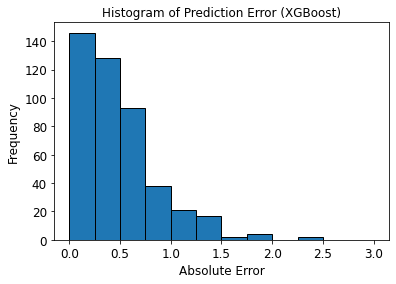

In [58]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 3.25, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (XGBoost)', fontsize=12)
plt.xlabel("Absolute Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Hist of Error.pdf', dpi=1000, bbox_inches='tight')
average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

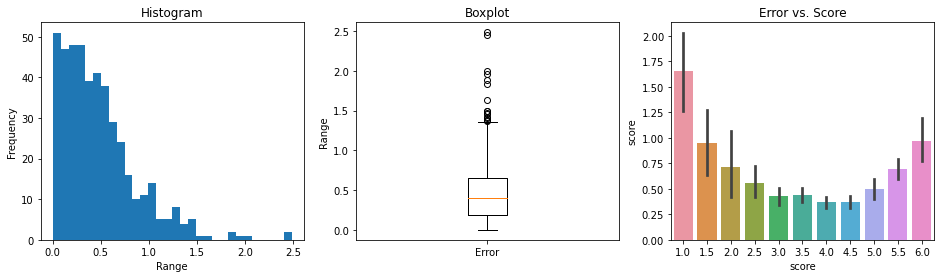

In [59]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

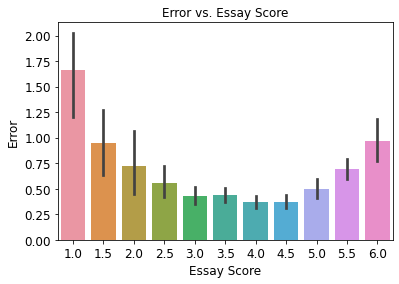

In [60]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Essay Score', fontsize=12)
plt.xlabel('Essay Score', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Error.pdf', dpi=1000, bbox_inches='tight')
plt.show()

## Neural Network

In [61]:
%%time
X_train_scaled = preprocessing.scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)
X_test_scaled = preprocessing.scale(X_test, axis=0, with_mean=True, with_std=True, copy=True)

print("Neural Network (Default)")
nn_reg = MLPRegressor()
nn_reg = fit_regressor(nn_reg, X_train_scaled, y_train)
evaluate_regressor(nn_reg, X_test_scaled, y_test)

Neural Network (Default)
MSE: 1.0280962451232543, RMSE: 1.0139508100116368
Wall time: 1.35 s


In [62]:
%%time
# param_grid = {"activation": ['identity', 'logistic', 'tanh', 'relu'],
#               "solver": ['lgfgs', 'sgd', 'adam'],
#               "alpha": [0.001, 0.01, 0.1],
#               "random_state": [42]}

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'random_state': [42],
    'max_iter': [500]
}

print("Neural Network (Optimal)")
nn_reg = MLPRegressor()
nn_reg = grid_search_for_regressor(nn_reg, param_grid, X_train_scaled, y_train)
train_and_evaluate_regressor(nn_reg, X_train_scaled, y_train, X_test_scaled, y_test)

Neural Network (Optimal)
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'max_iter': 500, 'random_state': 42, 'solver': 'sgd'}
training time 4.019 s
predict time 0.002 s
MSE: 0.4192828983223389, RMSE: 0.6475205775281114
Wall time: 10min 22s


MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=(50, 50),
             max_iter=500, random_state=42, solver='sgd')

In [63]:
nn_reg

MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=(50, 50),
             max_iter=500, random_state=42, solver='sgd')

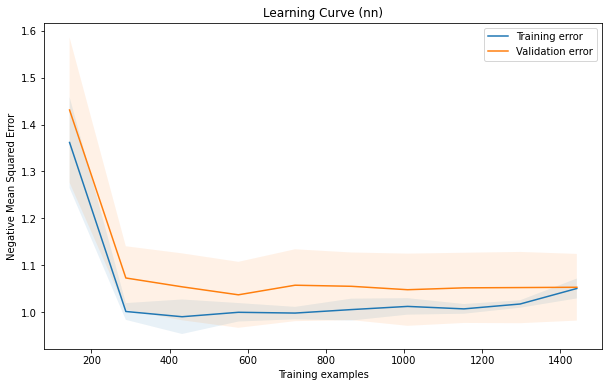

In [64]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    nn_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (nn)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [65]:
y_pred = nn_reg.predict(X_test_scaled)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   2.812847
1       4.0   3.902707
2       3.5   3.511839
3       3.0   3.172689
4       3.5   4.642498
..      ...        ...
446     2.5   3.185967
447     4.5   4.428342
448     3.0   3.102847
449     3.0   3.284333
450     2.5   3.007863

[451 rows x 2 columns]


Average Absolute Error: 0.502186018888128


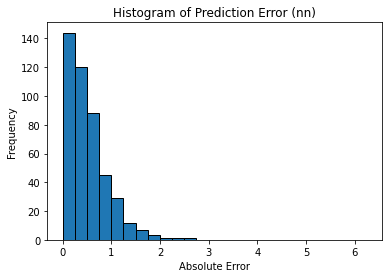

In [66]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (nn)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

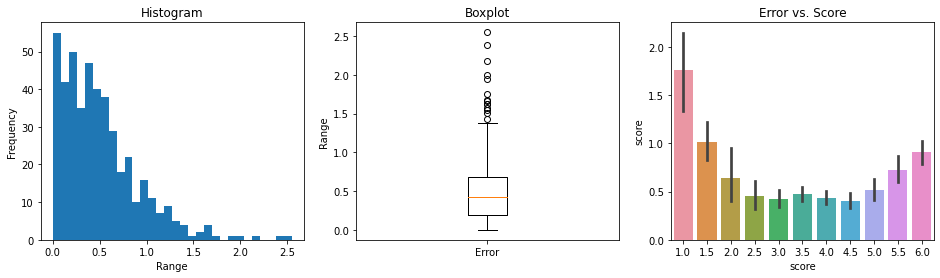

In [67]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

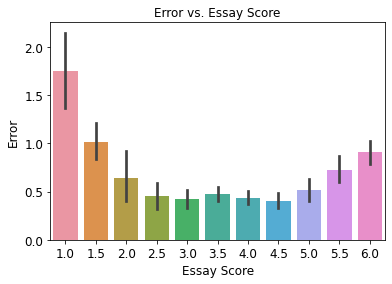

In [68]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Essay Score', fontsize=12)
plt.xlabel('Essay Score', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Error2.pdf', dpi=1000, bbox_inches='tight')
plt.show()

## SVR

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
import numpy as np
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Standardize the features
scaler = StandardScaler()
X_train_svr = scaler.fit_transform(X_train)
X_test_svr = scaler.transform(X_test)
# Define the hyperparameters to tune
hyperparameters = {'C': np.logspace(-4, 4, 10, 20), 'kernel': ['rbf']}
# Create a SVR object
svr = SVR()
# Create a GridSearchCV object
clf = GridSearchCV(svr, hyperparameters, cv=5, verbose=0)
# Fit the model to the training data
clf.fit(X_train_svr, y_train)
# Make predictions on the testing set
y_pred = clf.predict(X_test_svr)
# Create a DataFrame
df2 = pd.DataFrame({'Predicted Values': y_pred, 'Target Values': y_test})
# Print the DataFrame
print(df2)
# Calculate and print the Mean Squared Error of the model on the testing set
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Calculate and print the Root Mean Squared Error of the model on the testing set
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
# Print the best parameters
print('Best parameters:', clf.best_params_)

      Predicted Values  Target Values
2063          3.097642            3.0
1263          4.079584            4.0
2127          3.291122            3.5
599           3.279064            3.0
464           4.575771            3.5
...                ...            ...
1880          3.262216            2.5
427           4.437308            4.5
374           3.269113            3.0
105           3.512031            3.0
1966          3.305929            2.5

[451 rows x 2 columns]
Mean Squared Error: 0.47365657292839375
Root Mean Squared Error: 0.6882271230694078
Best parameters: {'C': 0.3593813663804626, 'kernel': 'rbf'}


In [80]:
y_pred = clf.predict(X_test_svr)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.097642
1       4.0   4.079584
2       3.5   3.291122
3       3.0   3.279064
4       3.5   4.575771
..      ...        ...
446     2.5   3.262216
447     4.5   4.437308
448     3.0   3.269113
449     3.0   3.512031
450     2.5   3.305929

[451 rows x 2 columns]


Average Absolute Error: 0.5160926444414543


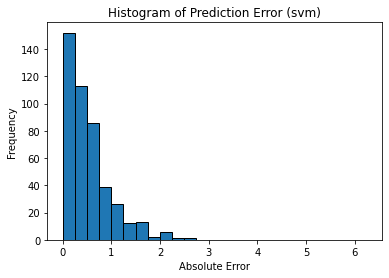

In [81]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (svm)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

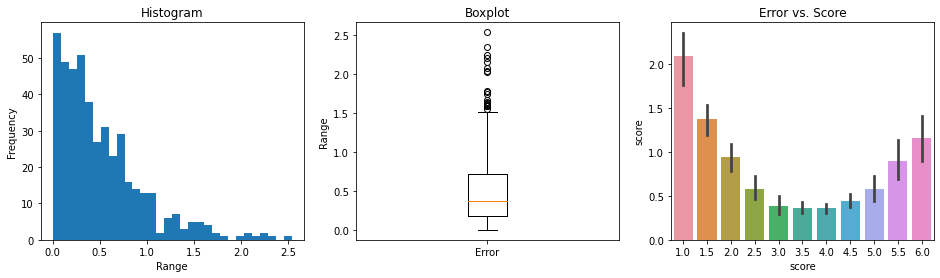

In [82]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

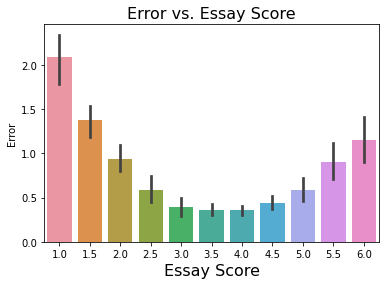

In [83]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Essay Score', fontsize=16)
plt.xlabel('Essay Score', fontsize=16)
plt.ylabel('Error')

plt.show()

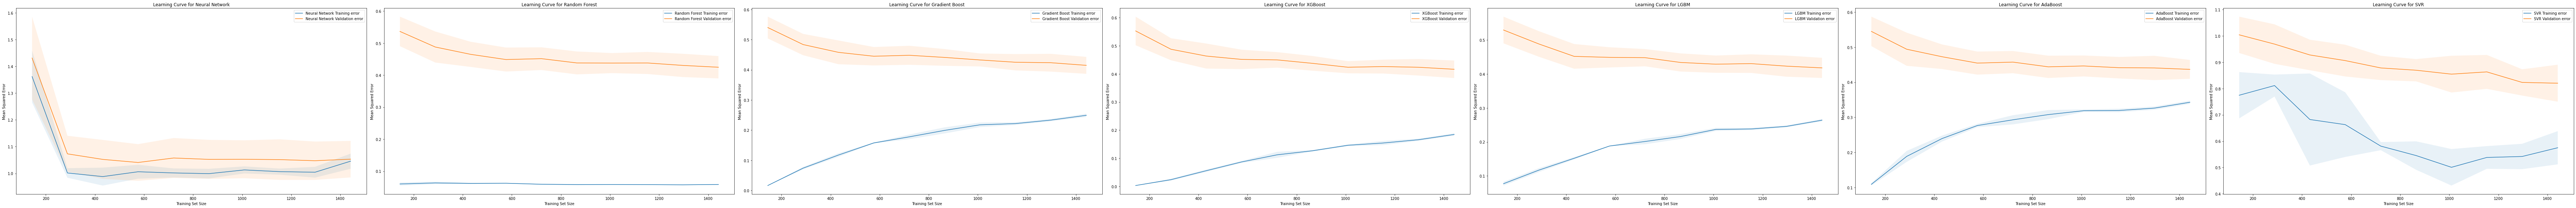

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Assume X_train, y_train are already defined and models list is given
models = [nn_reg, rf_reg, gb_reg, xgb_reg, ab_reg, clf]  # Replace with your models
model_names = ['Neural Network', 'Random Forest', 'Gradient Boost', 'XGBoost', 'AdaBoost', 'SVR']  # Replace with your model names
# Number of rows and columns for subplots
n_rows = 1
n_cols = len(models)
# Create a figure for subplots
plt.figure(figsize=(14 * n_cols, 8))
for idx, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(n_rows, n_cols, idx)
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    # Calculate mean and standard deviation for training set scores
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    # Calculate mean and standard deviation for validation set scores
    validation_mean = -validation_scores.mean(axis=1)
    validation_std = validation_scores.std(axis=1)
    # Plot learning curves
    plt.plot(train_sizes, train_mean, label=f'{name} Training error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, validation_mean, label=f'{name} Validation error')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1)
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
plt.tight_layout()
plt.show()

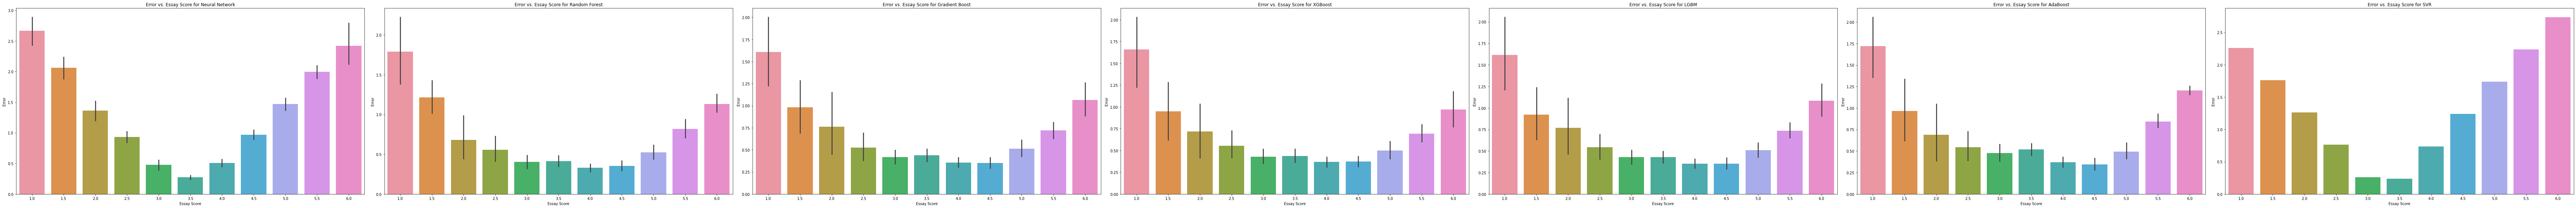

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Assume X_train, y_train are already defined and models list is given
models = [nn_reg, rf_reg, gb_reg, xgb_reg, ab_reg, clf]  # Replace with your models
model_names = ['Neural Network', 'Random Forest', 'Gradient Boost', 'XGBoost', 'AdaBoost', 'SVR']  # Replace with your model names
# Number of rows and columns for subplots
n_rows = 1
n_cols = len(models)
# Create a figure for subplots
plt.figure(figsize=(14 * n_cols, 8))
for idx, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(n_rows, n_cols, idx)
    y_pred = model.predict(X_test)
    error = abs(y_pred - y_test)
    sns.barplot(data=None, x=y_test, y=error)
    plt.title(f'Error vs. Essay Score for {name}')
    plt.xlabel('Essay Score')
    plt.ylabel('Error')
plt.tight_layout()
plt.show()

## Result

In [90]:
print("gb")
evaluate_regressor(gb_reg, X_test, y_test)
print("rf")
evaluate_regressor(rf_reg, X_test, y_test)
print("ab")
evaluate_regressor(ab_reg, X_test, y_test)
print("xgb")
evaluate_regressor(xgb_reg, X_test, y_test)
print("nn")
evaluate_regressor(nn_reg, X_test_scaled, y_test)
print("svm")
print("MSE:", mse, ", RMSE:", rmse)

gb
MSE: 0.3795204653324348, RMSE: 0.6160523235346449
rf
MSE: 0.3964530487804878, RMSE: 0.6296451768897208
ab
MSE: 0.4323554701820426, RMSE: 0.6575374287308994
xgb
MSE: 0.38747646457218066, RMSE: 0.6224760755018466
nn
MSE: 0.4192828983223389, RMSE: 0.6475205775281114
svm
MSE: 0.47365657292839375 , RMSE: 0.6882271230694078
